In [1]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA

from sklearn. decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/forestfires.csv')
#  updated has all float values of area removed-
# df = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/forestfiresUpdated.csv') 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
m = len(df)
m

517

In [4]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int

list1 = ['month']

def binary_map (v1) :
    return v1.map({'jan' : 0, "feb": 1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, 'aug' : 7, "sep": 8, "oct":9, 'nov' : 10, "dec": 11})

df[list1] = df[list1] . apply(binary_map)
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
list2 = ['day']

def binary_map (v2) :
    return v2.map({'mon' : 0, "tue": 1, 'wed' : 2, "thu": 3, 'fri' : 4, "sat": 5, 'sun' : 6 })

df[list2] = df[list2] . apply(binary_map)
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,7,6,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,7,6,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,7,6,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,7,5,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,10,1,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [6]:
x = df.iloc[:, 0:11].values #1st 12 cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x

array([[ 7,  5,  2, ...,  8, 51,  6],
       [ 7,  4,  9, ..., 18, 33,  0],
       [ 7,  4,  9, ..., 14, 33,  1],
       ...,
       [ 7,  4,  7, ..., 21, 70,  6],
       [ 1,  4,  7, ..., 25, 42,  4],
       [ 6,  3, 10, ..., 11, 31,  4]])

In [7]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

print(utils.multiclass.type_of_target(y))

print(utils.multiclass.type_of_target(y.astype('int')))

print(utils.multiclass.type_of_target(encoded))

binary
binary
binary


In [8]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [9]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [10]:
#  This is the extras - 
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

In [11]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, Y_train)
    print(clf.predict(X_test),'\n')

SVR()
[ 1.10283557  0.71919348  0.60027366  0.55388102  0.82379742  1.05820474
  0.59044854  0.7204421   0.31340031  0.3885381   0.71012751  0.89997894
  0.72348775  0.27140946  0.26657067  0.67709318  0.32091309  0.33824094
  0.06558407  0.61496252  0.82924843  0.04140044  0.84449903  0.02175042
  0.56423269 -0.03398751  0.89828848  0.74051215  1.00534174  0.64175336
  0.14131074  0.61911415  0.67005481  0.82056127  0.64096169  0.52335706
 -0.03705378  0.39823464  0.629058    0.50960383  0.23792092  0.81726375
  0.55325845  0.77030241  0.39979409  0.72355978  0.394717    0.66859831
  0.18282578  0.79723812  0.41266144  0.5787334   0.44976969  0.64329107
 -0.00671109  0.41250437  0.49220957  0.26880654  0.92998839  0.82691139
  0.81024685  0.82069833  0.62762841  0.60180913  0.67740091  0.14793122
  0.50185894  0.80048579  0.68587835  0.78258492  0.40588958  0.48116637
  0.95612272  0.52846057  0.70923042  0.78689277  0.24022782 -0.00846822
  0.85394869  0.87307803  0.92575894  0.76022

Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [13]:
Y_pred = classifier.predict(X_test)

In [14]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[21, 23],
       [24, 36]])

In [15]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5480769230769231
Precision Score micro :  0.5480769230769231
Recall Score micro :  0.5480769230769231
Precision Score weighted :  0.5494567579313342
Recall Score weighted :  0.5480769230769231


Text(0.5, 427.9555555555555, 'Predicted label')

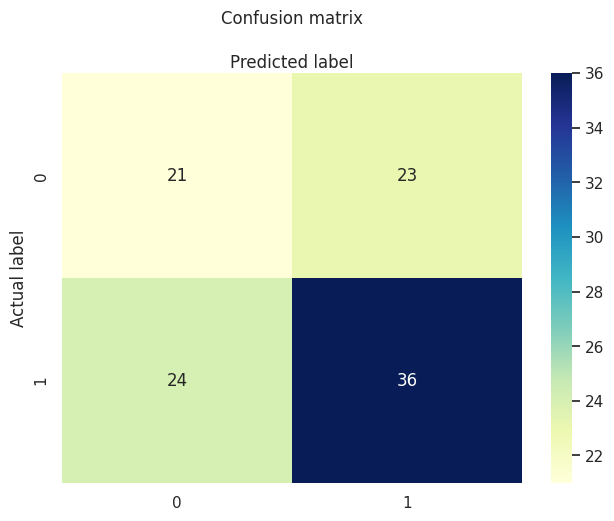

In [16]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

using only 3rd col - MONTH

In [27]:
x = df.iloc[:, 2].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [35]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [29]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [31]:
Y_pred = classifier.predict(X_test)

In [32]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[15, 29],
       [ 9, 51]])

In [33]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.6346153846153846
Precision Score micro :  0.6346153846153846
Recall Score micro :  0.6346153846153846
Precision Score weighted :  0.6322115384615384
Recall Score weighted :  0.6346153846153846


Text(0.5, 427.9555555555555, 'Predicted label')

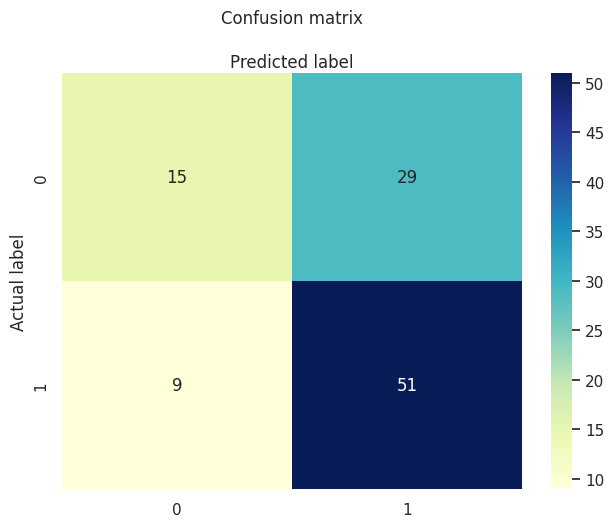

In [34]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

4th col - DAY

In [36]:
x = df.iloc[:, 3].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [37]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [38]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [40]:
Y_pred = classifier.predict(X_test)

In [41]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[25, 19],
       [34, 26]])

In [42]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.49038461538461536
Precision Score micro :  0.49038461538461536
Recall Score micro :  0.49038461538461536
Precision Score weighted :  0.5126032159930465
Recall Score weighted :  0.49038461538461536


Text(0.5, 427.9555555555555, 'Predicted label')

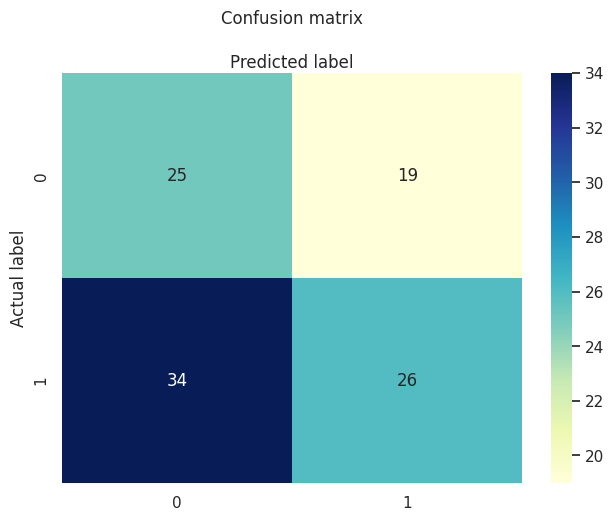

In [43]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

5TH COL - FFMC

In [52]:
x = df.iloc[:, 4].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [53]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [54]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [56]:
Y_pred = classifier.predict(X_test)

In [57]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[10, 34],
       [11, 49]])

In [58]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5673076923076923
Precision Score micro :  0.5673076923076923
Recall Score micro :  0.5673076923076923
Precision Score weighted :  0.5420583432631626
Recall Score weighted :  0.5673076923076923


Text(0.5, 427.9555555555555, 'Predicted label')

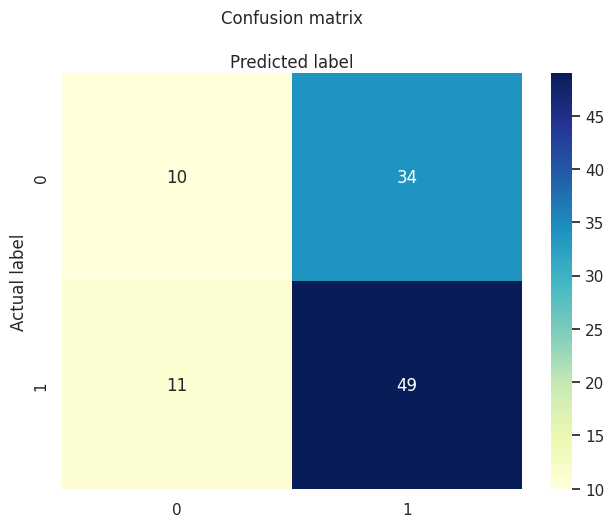

In [59]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

6TH COL - DMC

In [60]:
x = df.iloc[:, 5].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [61]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [62]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [64]:
Y_pred = classifier.predict(X_test)

In [65]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[ 8, 36],
       [ 3, 57]])

In [66]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.625
Precision Score micro :  0.625
Recall Score micro :  0.625
Precision Score weighted :  0.6612903225806452
Recall Score weighted :  0.625


Text(0.5, 427.9555555555555, 'Predicted label')

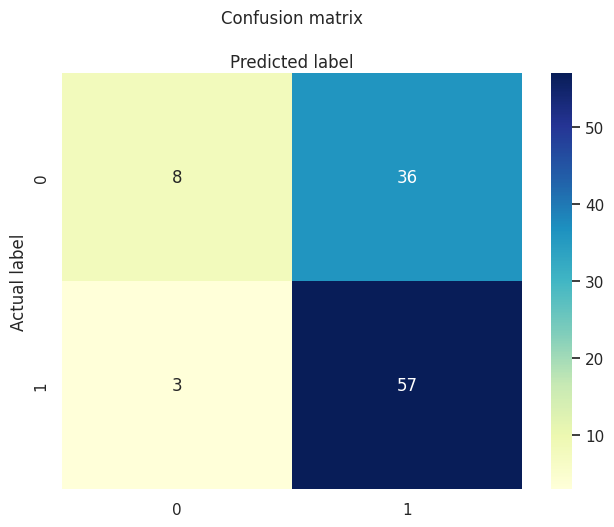

In [67]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

7TH COL - DC

In [68]:
x = df.iloc[:, 6].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [69]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [70]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [72]:
Y_pred = classifier.predict(X_test)

In [73]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[15, 29],
       [ 9, 51]])

In [74]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.6346153846153846
Precision Score micro :  0.6346153846153846
Recall Score micro :  0.6346153846153846
Precision Score weighted :  0.6322115384615384
Recall Score weighted :  0.6346153846153846


Text(0.5, 427.9555555555555, 'Predicted label')

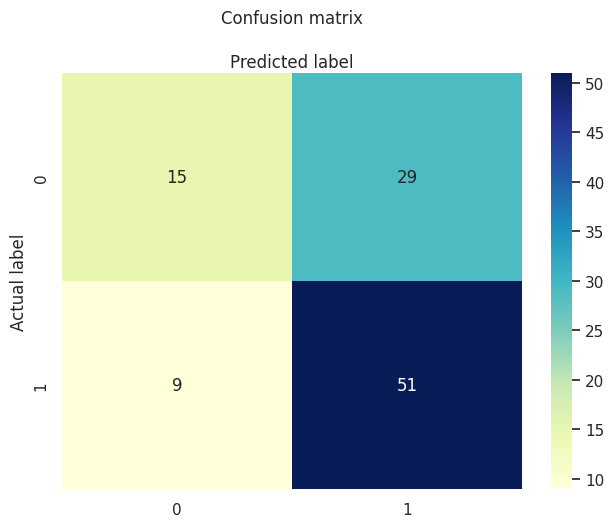

In [75]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

8TH COL - ISI

In [76]:
x = df.iloc[:, 7].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [77]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [78]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [79]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [80]:
Y_pred = classifier.predict(X_test)

In [81]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[10, 34],
       [ 9, 51]])

In [82]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5865384615384616
Precision Score micro :  0.5865384615384616
Recall Score micro :  0.5865384615384616
Precision Score weighted :  0.5688259109311741
Recall Score weighted :  0.5865384615384616


Text(0.5, 427.9555555555555, 'Predicted label')

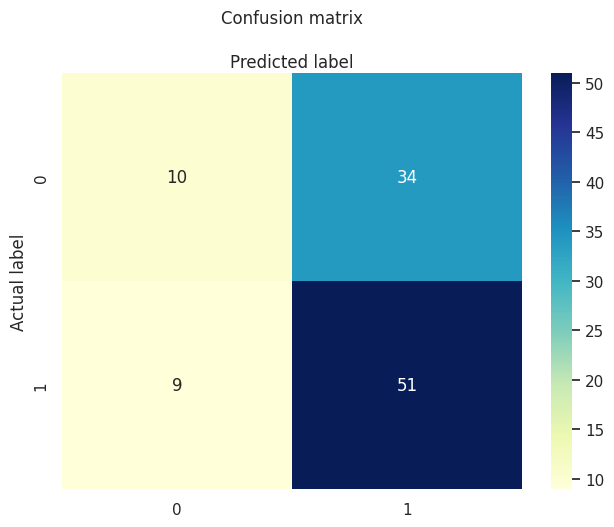

In [83]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

9TH COL - TEMP

In [84]:
x = df.iloc[:, 8].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [85]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [86]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [88]:
Y_pred = classifier.predict(X_test)

In [89]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[ 9, 35],
       [ 6, 54]])

In [90]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.6057692307692307
Precision Score micro :  0.6057692307692307
Recall Score micro :  0.6057692307692307
Precision Score weighted :  0.6038893690579085
Recall Score weighted :  0.6057692307692307


Text(0.5, 427.9555555555555, 'Predicted label')

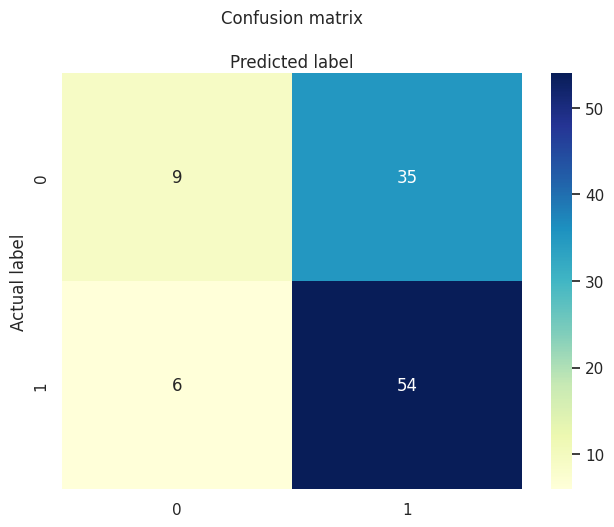

In [91]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

10TH COL - RH

In [92]:
x = df.iloc[:, 9].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [93]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [94]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [96]:
Y_pred = classifier.predict(X_test)

In [97]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[ 9, 35],
       [ 9, 51]])

In [98]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5769230769230769
Precision Score micro :  0.5769230769230769
Recall Score micro :  0.5769230769230769
Precision Score weighted :  0.5536672629695886
Recall Score weighted :  0.5769230769230769


Text(0.5, 427.9555555555555, 'Predicted label')

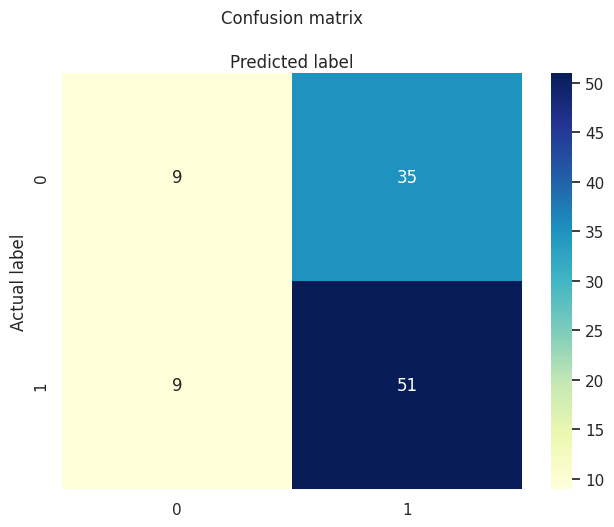

In [99]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

11TH COL - WIND

In [100]:
x = df.iloc[:, 10].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [101]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [102]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [104]:
Y_pred = classifier.predict(X_test)

In [105]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[22, 22],
       [26, 34]])

In [106]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5384615384615384
Precision Score micro :  0.5384615384615384
Recall Score micro :  0.5384615384615384
Precision Score weighted :  0.5441849816849816
Recall Score weighted :  0.5384615384615384


Text(0.5, 427.9555555555555, 'Predicted label')

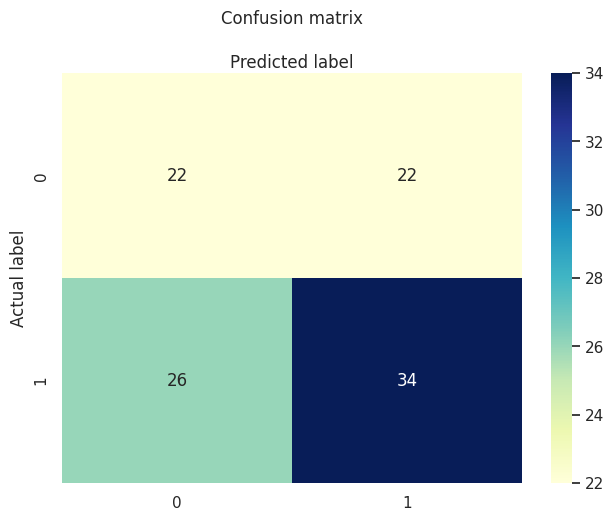

In [107]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

12TH COL - RAIN

In [108]:
x = df.iloc[:, 11].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [109]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [110]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [111]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [112]:
Y_pred = classifier.predict(X_test)

In [113]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix

array([[ 0, 44],
       [ 0, 60]])

In [114]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision Score micro : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='micro'))
print("Recall Score micro : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='micro'))

print("Precision Score weighted : ",metrics.precision_score(Y_test, Y_pred, pos_label='positive', average='weighted'))
print("Recall Score weighted : ",metrics.recall_score(Y_test, Y_pred, pos_label='positive', average='weighted'))

Accuracy: 0.5769230769230769
Precision Score micro :  0.5769230769230769
Recall Score micro :  0.5769230769230769
Precision Score weighted :  0.3328402366863905
Recall Score weighted :  0.5769230769230769


Text(0.5, 427.9555555555555, 'Predicted label')

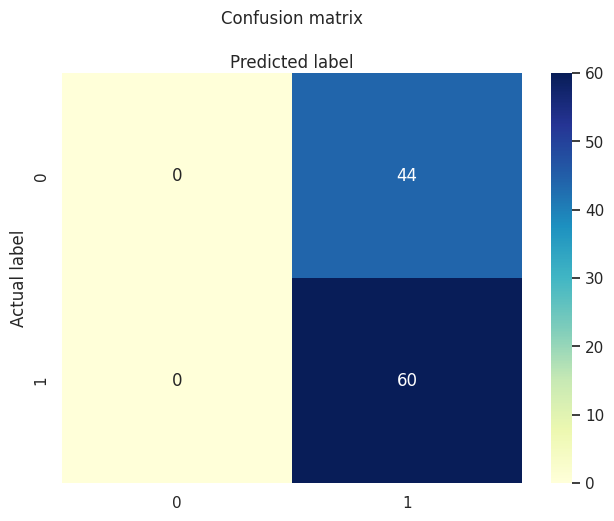

In [115]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')